# Import csv function

In [3]:
def python_csv(csv_file):
    import csv

    t = [] # column 0
    data1 = [] # column 1
    with open(csv_file) as f:
        reader = csv.reader(f)
        for row in reader:
            # read the rows 1 one by one
            data1.append(float(row[0])) # leftmost column
            t.append(float(row[1])) # second column
    return t, data1;

### Calculate sample rate function

In [4]:
def calculate_sample_rate(time): # Time is output t from python_csv()
    #sample rate = number of data points / total time of samples
    sample_rate = len(time) / (time[-1] - time[0])
    return sample_rate

In [5]:
calculate_sample_rate(python_csv('sigA.csv')[1])

10000.20000400008

In [6]:
calculate_sample_rate(python_csv('sigB.csv')[1])

3300.2000121219467

In [7]:
calculate_sample_rate(python_csv('sigC.csv')[1])

2500.1250062503127

In [8]:
calculate_sample_rate(python_csv('sigD.csv')[1])

400.0833506980621

# 4. FFT function

In [9]:
def FFT2(s,t): # s = data list, t = time list
    import matplotlib.pyplot as plt
    import numpy as np

    Fs = calculate_sample_rate(t) # sample rate
    y = s # the data to make the fft from
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]

    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(t,y,'b')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax2.loglog(frq,abs(Y),'b') # plotting the fft
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    plt.show()

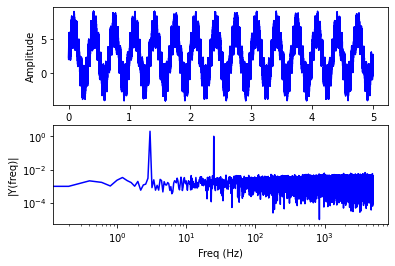

In [10]:
# CSV A
s,t = python_csv('sigA.csv')
FFT2(s,t)

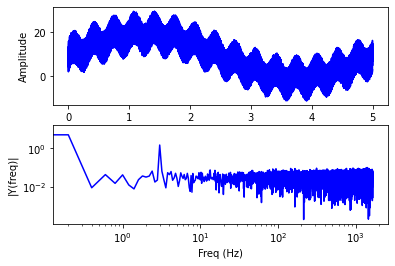

In [11]:
# CSV B
s,t = python_csv('sigB.csv')
FFT2(s,t)

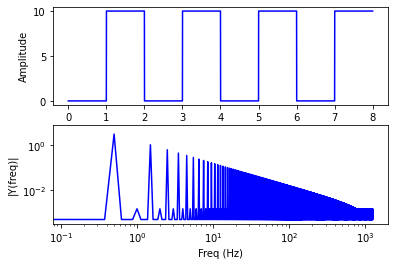

In [12]:
# CSV C
s,t = python_csv('sigC.csv')
FFT2(s,t)

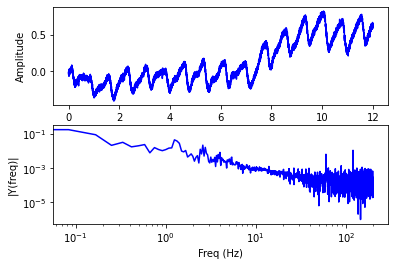

In [13]:
# CSV D
s,t = python_csv('sigD.csv')
FFT2(s,t)

# 5. Moving average filter

In [14]:
def MAV(data, time, x):
    import numpy as np
    
    data_length = len(data)
    data = (x * [0]) + data # Set first x values to 0
    for i in range(data_length):
        data[i] = sum(data[i:(i+x)])
    data_new = np.array(data) / x
    data_new = data_new.tolist()
    return data_new[x-1:-1], time

In [15]:
def p5(csv_file,x):
    import matplotlib.pyplot as plt
    import numpy as np
    
    s,t = python_csv(csv_file)
    sa,ta = MAV(s,t,x)
    
    # FFT Plot
    Fs = calculate_sample_rate(t) # sample rate
    y = s # the data to make the fft from
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]

    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(t,y,'k')
    ax1.plot(t,sa,'r')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax2.loglog(frq,abs(Y),'k') # plotting the fft
    
    y = sa # the data to make the fft from
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]
    
    ax2.loglog(frq,abs(Y),'r') # plotting the fft
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    plt.suptitle(csv_file + ', ' + str(x) + ' points averaged')
    plt.show()

### Function to create plots for problem 5

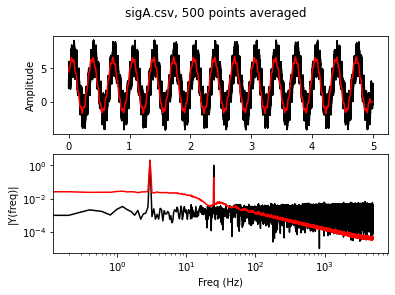

In [16]:
p5('sigA.csv',500)

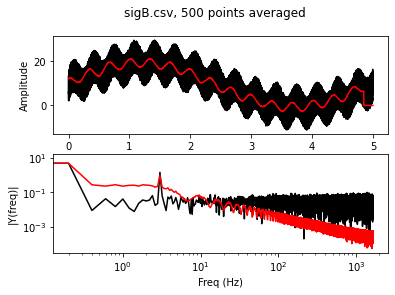

In [17]:
p5('sigB.csv',500)

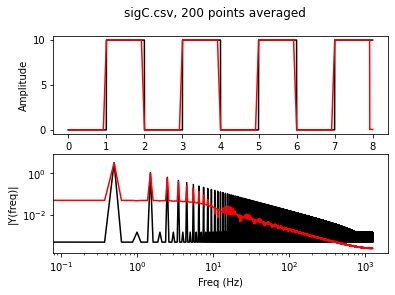

In [18]:
p5('sigC.csv',200)

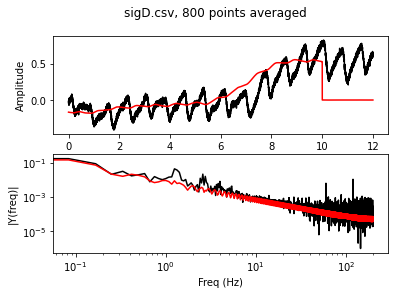

In [19]:
p5('sigD.csv',800)

# 6. IIR Filter

In [20]:
def IIR(data, time, A, B):
    import numpy as np
    
    data_length = len(data)
    data_new = [0] * data_length
    for i in range(1,data_length):
        data_new[i] = A * data_new[i-1] + B * data[i]
    return data_new, time

In [21]:
def p6(csv_file,A,B):
    import matplotlib.pyplot as plt
    import numpy as np
    
    s,t = python_csv(csv_file)
    sa,ta = IIR(s,t,A,B)
    
    # FFT Plot
    Fs = calculate_sample_rate(t) # sample rate
    y = s # the data to make the fft from
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]

    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(t,y,'k')
    ax1.plot(t,sa,'r')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax2.loglog(frq,abs(Y),'k') # plotting the fft
    
    y = sa # the data to make the fft from
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]
    
    ax2.loglog(frq,abs(Y),'r') # plotting the fft
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    plt.suptitle(csv_file + ', ' + 'A = ' + str(A) + ', ' + 'B = ' + str(B))
    plt.show()

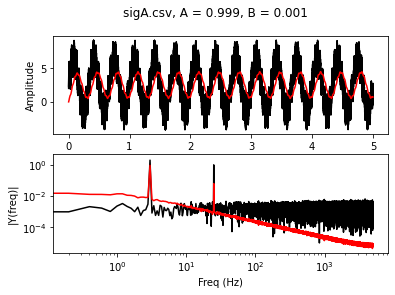

In [22]:
p6('sigA.csv',0.999,0.001)

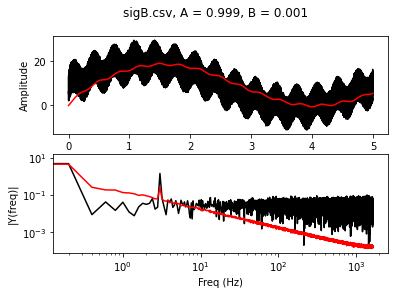

In [23]:
p6('sigB.csv',0.999,0.001)

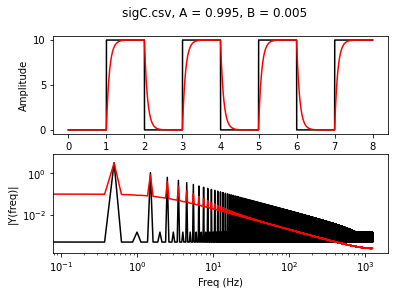

In [24]:
p6('sigC.csv',0.995,0.005)

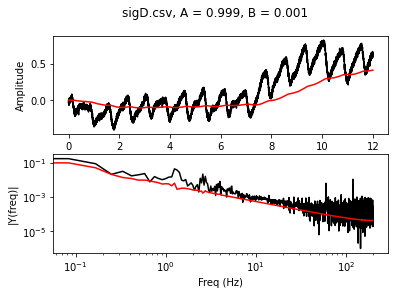

In [25]:
p6('sigD.csv',0.999,0.001)

# 7. FIR Filter

In [70]:
# Old version that didn't work properly
def FIR_old(data, time, h):
    import numpy as np
    
    data_length = len(data)
    x = len(h)
    data = (x * [0]) + data # Set first x values to 0
    for i in range(data_length):
        for j in range(x):
            data[i] += h[j] * data[i+j]
    data_new = np.array(data)
    data_new = data_new.tolist()
    return data_new[x-1:-1], time

In [71]:
# Best version using list operations
def FIR(data, time, h):
    import numpy as np
    x = len(h)
    data_new = np.zeros(len(data))
    for i in range(x,len(data)-x):
        for j in range(x):
            data_new[i] += h[j] * data[i-j]
    return data_new, time

In [72]:
# Fixed version using convolve
def FIR_convolve(data, time, h):
    import numpy as np
    
#     data_length = len(data)
#     x = len(h)
    data_new = np.convolve(data, h, mode = "same")
    
#     data = (x * [0]) + data # Set first x values to 0
#     for i in range(x,data_length+x):
#         for j in range(x):
#             data[i] += h[j] * data[i-j]

    return data_new, time

In [95]:
def p7(csv_file,h):
    import matplotlib.pyplot as plt
    import numpy as np
    
    s,t = python_csv(csv_file)
    sa,ta = FIR(s,t,h)
    
    # FFT Plot
    Fs = calculate_sample_rate(t) # sample rate
    y = s # the data to make the fft from
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]

    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(t,y,'k')
    ax1.plot(t,sa,'r')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax2.loglog(frq,abs(Y),'k') # plotting the fft
    
    y = sa # the data to make the fft from
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]
    
    ax2.loglog(frq,abs(Y),'r') # plotting the fft
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    plt.suptitle(csv_file + ', ' +'Kaiser, '+ 'f_l = 12 Hz, b_l = 28 Hz')
    plt.show()

In [90]:
h = [
    0.007649232461003675,
    0.011785642088230047,
    0.016849947718565666,
    0.022729214326209404,
    0.029236234748848105,
    0.036117413095518219,
    0.043067071418621580,
    0.049747191614344079,
    0.055811025677837481,
    0.060928570343499529,
    0.064811656972160486,
    0.067236384591329287,
    0.068060829887664764,
    0.067236384591329287,
    0.064811656972160486,
    0.060928570343499529,
    0.055811025677837481,
    0.049747191614344079,
    0.043067071418621580,
    0.036117413095518219,
    0.029236234748848105,
    0.022729214326209404,
    0.016849947718565669,
    0.011785642088230042,
    0.007649232461003675,
]

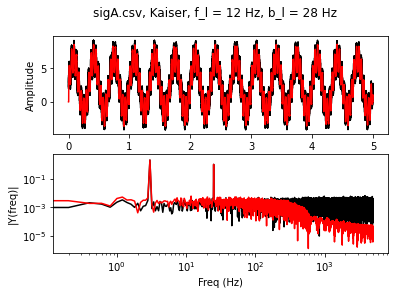

In [96]:
# CSV A
p7('sigA.csv',h)

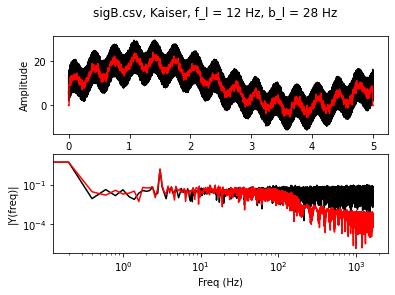

In [97]:
# CSV B
p7('sigB.csv',h)

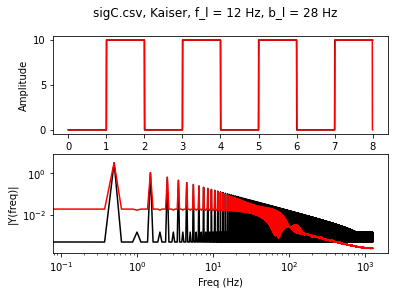

In [98]:
# CSV C
p7('sigC.csv',h)

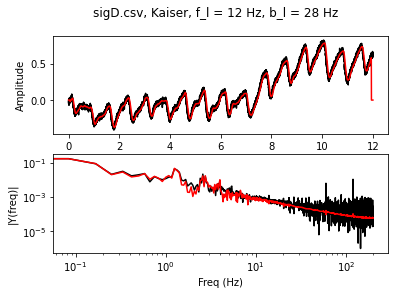

In [99]:
# CSV D
p7('sigD.csv',h)